In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [5]:
df = pd.read_csv('C:/Users/HP/house-price-predictor/data/raw/apartments.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2520, 7)


,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [6]:
print(df.info())
print("\n" + "="*50)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nBasic statistics:")
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  2520 non-null   int64
 1   title       2520 non-null   str  
 2   location    2144 non-null   str  
 3   bedrooms    2520 non-null   int64
 4   bathrooms   2520 non-null   int64
 5   price       2520 non-null   str  
 6   rate        2520 non-null   str  
dtypes: int64(3), str(4)
memory usage: 137.9 KB
None


Missing values:
Unnamed: 0      0
title           0
location      376
bedrooms        0
bathrooms       0
price           0
rate            0
dtype: int64


Basic statistics:


,Unnamed: 0,bedrooms,bathrooms
count,2520.000000,2520.000000,2520.000000
mean,1259.500000,2.551190,2.450794
std,727.605662,0.922868,0.976480
min,0.000000,1.000000,1.000000
25%,629.750000,2.000000,2.000000
50%,1259.500000,3.000000,2.000000
75%,1889.250000,3.000000,3.000000
max,2519.000000,4.000000,5.000000


In [7]:
# Create a copy to work with
df_clean = df.copy()

# Drop the unnamed column
df_clean = df_clean.drop('Unnamed: 0', axis=1)

# Convert price from string to numeric
# Remove spaces and convert to integer
df_clean['price'] = df_clean['price'].str.replace(' ', '').astype(int)

# Check the result
print("Cleaned price column:")
print(df_clean['price'].describe())
print("\nData types after cleaning:")
print(df_clean.dtypes)

Cleaned price column:
count      2520.000000
mean      89274.900794
std       63943.997415
min        5000.000000
25%       55000.000000
50%       70000.000000
75%      100000.000000
max      300000.000000
Name: price, dtype: float64

Data types after cleaning:
title          str
location       str
bedrooms     int64
bathrooms    int64
price        int64
rate           str
dtype: object


In [8]:
# Check missing locations
print(f"Missing locations: {df_clean['location'].isnull().sum()}")

# Fill missing locations with 'Unknown'
df_clean['location'] = df_clean['location'].fillna('Unknown')

# Check top locations
print("\nTop 10 locations:")
print(df_clean['location'].value_counts().head(10))

# Check the cleaned dataset
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Missing locations: 376

Top 10 locations:
location
Unknown                                        376
Kileleshwa, Nairobi                            257
Westlands, Nairobi                             252
Kilimani, Nairobi                              251
Shanzu, Mombasa                                129
Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu    128
Westlands downtown, Westlands, Nairobi         127
Links Rd Mombasa, Nyali, Mombasa               126
Muthaiga, Nairobi                              126
Riverside Dr Nairobi, Riverside, Nairobi       125
Name: count, dtype: int64

Final dataset shape: (2520, 6)
Missing values: 0


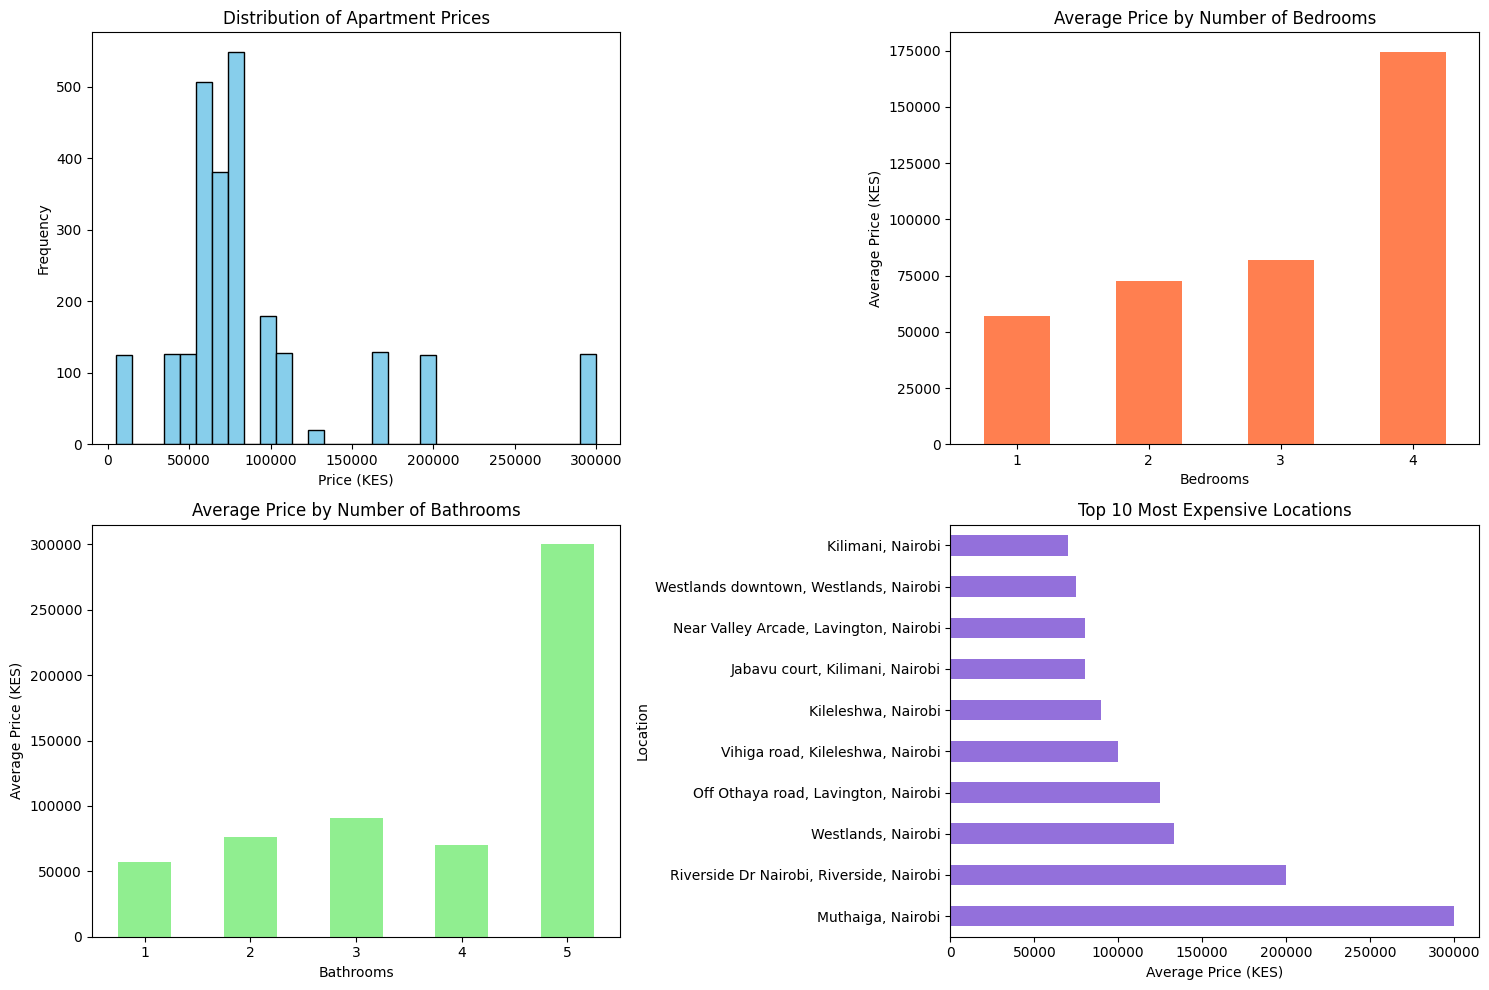

In [9]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Price distribution
axes[0, 0].hist(df_clean['price'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Apartment Prices')
axes[0, 0].set_xlabel('Price (KES)')
axes[0, 0].set_ylabel('Frequency')

# 2. Price vs Bedrooms
df_clean.groupby('bedrooms')['price'].mean().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Average Price by Number of Bedrooms')
axes[0, 1].set_xlabel('Bedrooms')
axes[0, 1].set_ylabel('Average Price (KES)')
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Price vs Bathrooms
df_clean.groupby('bathrooms')['price'].mean().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Average Price by Number of Bathrooms')
axes[1, 0].set_xlabel('Bathrooms')
axes[1, 0].set_ylabel('Average Price (KES)')
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Top 10 locations by average price
top_locations = df_clean[df_clean['location'] != 'Unknown'].groupby('location')['price'].mean().nlargest(10)
top_locations.plot(kind='barh', ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Top 10 Most Expensive Locations')
axes[1, 1].set_xlabel('Average Price (KES)')
axes[1, 1].set_ylabel('Location')

plt.tight_layout()
plt.show()

In [10]:
# Save cleaned data for modeling
df_clean.to_csv('C:/Users/HP/house-price-predictor/data/processed/apartments_clean.csv', index=False)
print("Cleaned data saved!")
print(f"Shape: {df_clean.shape}")

Cleaned data saved!
Shape: (2520, 6)
